# CODSOFT - Data Science Internship
# Task:1: Titanic Survival Prediction #
## Name: Faizan Tanveer

#### Importing important libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### 1. Reading Data

In [163]:
data=pd.read_csv("tested.csv")
titanic=data.copy()

We can see following columns (i.e. features) of our dataset and their certain attributes below:

In [164]:
titanic

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male   NaN      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   
417                      Peter, Master. Michael J    male   NaN      1      1   

                 Ticket      Fare Cabin Embarked  
0                330911    7.8292   NaN        Q  
1                363272    7.0000   NaN        S  
2                240276    9.6875   NaN        Q  
3                315154    8.6625   NaN        S  
4               3101298   12.2875   NaN        S  
..                  ...       ...   ...      ...  
413           A.5. 3236    8.0500   NaN        S  
414            PC 17758  108.9000  C105        C  
415  SOTON/O.Q. 3101262    7.2500   NaN        S  
416              359309    8.0500   NaN        S  
417                2668   22.3583   NaN        C  

[418 rows x 12 columns]

In [165]:
titanic.shape

(418, 12)

In [166]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [167]:
titanic.describe(include='all')

PassengerId    Survived      Pclass              Name   Sex  \
count    418.000000  418.000000  418.000000               418   418   
unique          NaN         NaN         NaN               418     2   
top             NaN         NaN         NaN  Kelly, Mr. James  male   
freq            NaN         NaN         NaN                 1   266   
mean    1100.500000    0.363636    2.265550               NaN   NaN   
std      120.810458    0.481622    0.841838               NaN   NaN   
min      892.000000    0.000000    1.000000               NaN   NaN   
25%      996.250000    0.000000    1.000000               NaN   NaN   
50%     1100.500000    0.000000    3.000000               NaN   NaN   
75%     1204.750000    1.000000    3.000000               NaN   NaN   
max     1309.000000    1.000000    3.000000               NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare  \
count   332.000000  418.000000  418.000000       418  417.000000   
unique         NaN         NaN         NaN       363         NaN   
top            NaN         NaN         NaN  PC 17608         NaN   
freq           NaN         NaN         NaN         5         NaN   
mean     30.272590    0.447368    0.392344       NaN   35.627188   
std      14.181209    0.896760    0.981429       NaN   55.907576   
min       0.170000    0.000000    0.000000       NaN    0.000000   
25%      21.000000    0.000000    0.000000       NaN    7.895800   
50%      27.000000    0.000000    0.000000       NaN   14.454200   
75%      39.000000    1.000000    0.000000       NaN   31.500000   
max      76.000000    8.000000    9.000000       NaN  512.329200   

                  Cabin Embarked  
count                91      418  
unique               76        3  
top     B57 B59 B63 B66        S  
freq                  3      270  
mean                NaN      NaN  
std                 NaN      NaN  
min                 NaN      NaN  
25%                 NaN      NaN  
50%                 NaN      NaN  
75%                 NaN      NaN  
max                 NaN      NaN

### 2. Completeness

Checking for the missing values in our dataset.

In [168]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Now, we see the column age and cabin have many null values.

### 3. Exploration

Let's visualize the relationship between our explanatory variables (features) and response variable (target), in order to do feature engineering out of it. 

<AxesSubplot:xlabel='Sex', ylabel='count'>

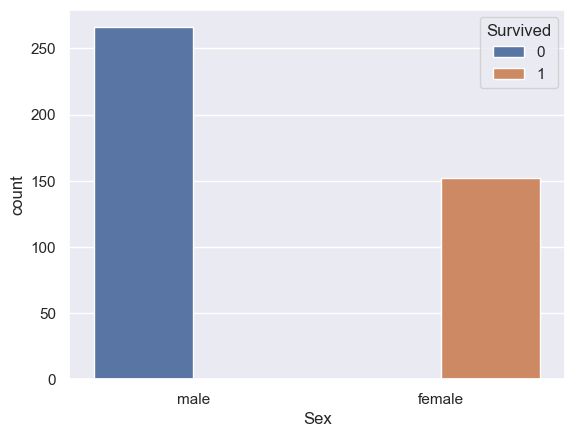

In [169]:
sns.countplot(x='Sex', hue='Survived', data=titanic)

Survival is somewhat related to the gender of the passengers. Females have greater chance of surviving the wreck.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

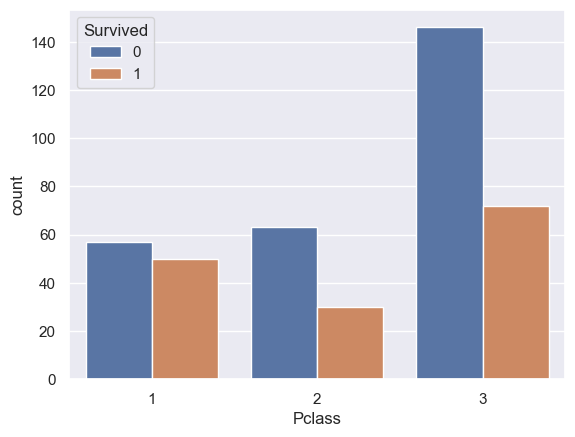

In [170]:
sns.countplot(x='Pclass', hue='Survived', data=titanic)

Survival is somewhat related to the PClass of the passengers. PClass 1 has a greater chance of surviving the wreck as compared to the other Classes.

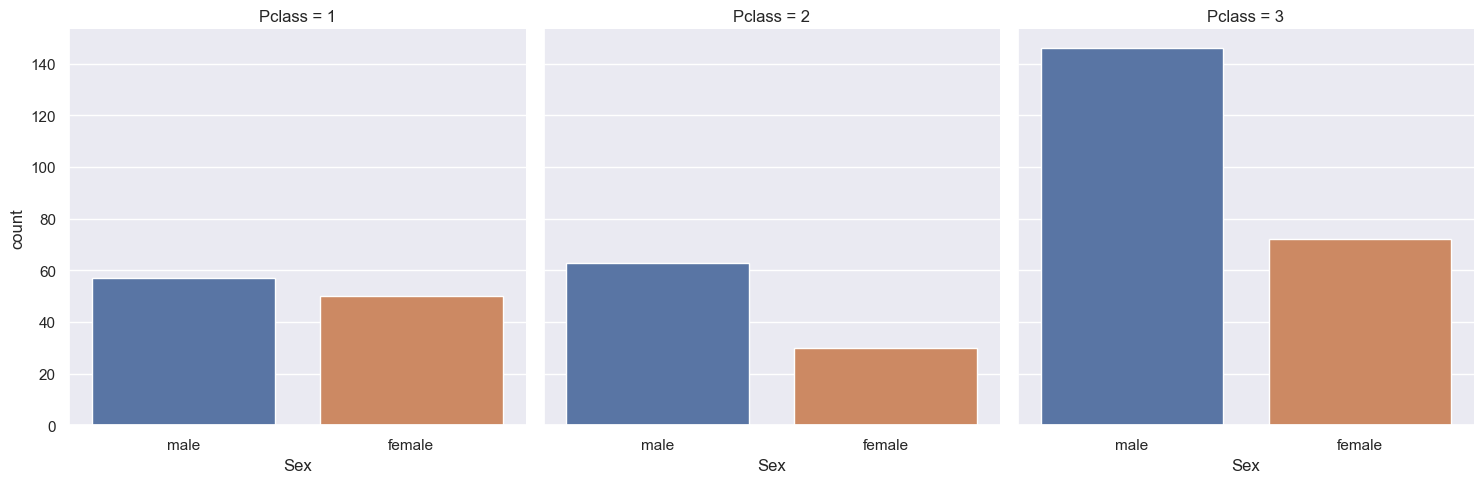

In [171]:
sns.catplot(x='Sex', col='Pclass', data=titanic, kind='count')

In [172]:
# plt.subplots(figsize=(10,6))
# sns.countplot(x='Cabin', hue='Survived', data=titanic)

Unreadible relationship due to continous numerical values.

In [173]:
# plt.subplots(figsize=(10,6))
# sns.countplot(x='Fare', hue='Survived', data=titanic)

Unreadible relationship due to continous numerical values.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

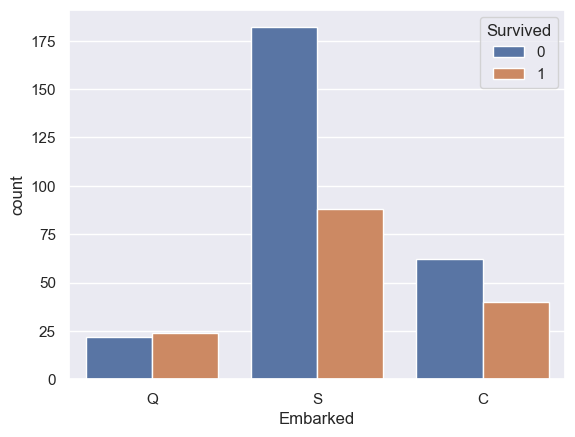

In [174]:
sns.countplot(x='Embarked', hue='Survived', data=titanic)

Survival is somewhat related to the Embarked column. Q column has a better ratio of survivalas compared to the other Columns.

### 4. Feature Engineering

### Dropping Columns

Since, Cabin column has too many null values and have no particular  relationship. So, it is better to drop it.

In [175]:
titanic.drop('Cabin',axis=1,inplace=True)

In [176]:
titanic.head(2)

PassengerId  Survived  Pclass                              Name     Sex  \
0          892         0       3                  Kelly, Mr. James    male   
1          893         1       3  Wilkes, Mrs. James (Ellen Needs)  female   

    Age  SibSp  Parch  Ticket    Fare Embarked  
0  34.5      0      0  330911  7.8292        Q  
1  47.0      1      0  363272  7.0000        S

### Adding columns
Now, we will add few columns by converting the existing columns of continous numerical values into categorical class for better readiability and visualization.

#### a. Title
We see all the names have their titles and if we could separate those titles, creating a new column out of it - we can check their relationship with the target variable (survival) getting better insights. 

In [177]:
import re
titanic['Title'] = titanic['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
titanic.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked Title  
0   330911   7.8292        Q    Mr  
1   363272   7.0000        S   Mrs  
2   240276   9.6875        Q    Mr  
3   315154   8.6625        S    Mr  
4  3101298  12.2875        S   Mrs

In [178]:
titanic['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [179]:
titanic.loc[(~titanic['Title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])), 'Title'] = 'Rare Title'

In [180]:
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare Title'], dtype=object)

In [181]:
titanic['Title'].value_counts()

Mr            240
Miss           78
Mrs            72
Master         21
Rare Title      7
Name: Title, dtype: int64

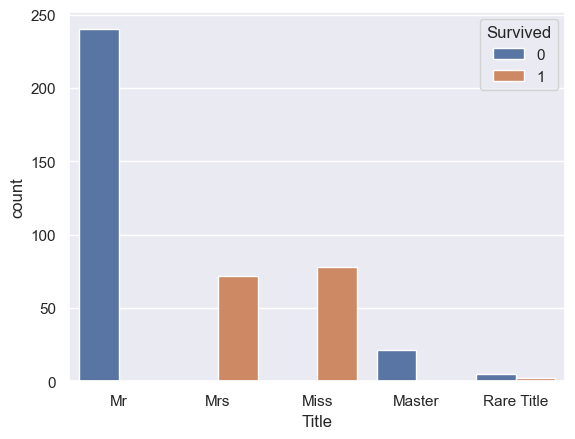

In [182]:
sns.countplot(data=titanic,x='Title', hue='Survived');

### Completing Columns

#### a. Fare
Completing the Fare column with median of the data, preventing it from getting skewed.

In [183]:
titanic['Fare'].mean()

35.6271884892086

In [184]:
titanic['Fare'].median()

14.4542

In [185]:
titanic[titanic['Fare'] == 0]

PassengerId  Survived  Pclass                                   Name  \
266         1158         0       1  Chisholm, Mr. Roderick Robert Crispin   
372         1264         0       1                Ismay, Mr. Joseph Bruce   

      Sex   Age  SibSp  Parch  Ticket  Fare Embarked Title  
266  male   NaN      0      0  112051   0.0        S    Mr  
372  male  49.0      0      0  112058   0.0        S    Mr

In [186]:
titanic.loc[(titanic['Fare'] == 0) & (titanic['Pclass'] == 1), 'Fare'] = titanic[titanic['Pclass'] == 1]['Fare'].median()
titanic.loc[(titanic['Fare'] == 0) & (titanic['Pclass'] == 2), 'Fare'] = titanic[titanic['Pclass'] == 2]['Fare'].median()
titanic.loc[(titanic['Fare'] == 0) & (titanic['Pclass'] == 3), 'Fare'] = titanic[titanic['Pclass'] == 3]['Fare'].median()

In [187]:
titanic[titanic['Fare'] == 0]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked, Title]
Index: []

In [188]:
median_fare=titanic['Fare'].mean()
print(median_fare)

35.91495827338127


In [189]:
mean_fare=titanic['Fare'].median()
print(mean_fare)

14.4583


In [190]:
null_fare = titanic[titanic['Fare'].isnull()]
null_fare

PassengerId  Survived  Pclass                Name   Sex   Age  SibSp  \
152         1044         0       3  Storey, Mr. Thomas  male  60.5      0   

     Parch Ticket  Fare Embarked Title  
152      0   3701   NaN        S    Mr

In [191]:
median_fare=titanic[titanic['Pclass'] == 3]['Fare'].median()
titanic['Fare'].fillna(median_fare, inplace=True)
titanic.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Title           0
dtype: int64

#### b. Age
Completing the Age column with median of that data, preventing it from getting skewed.

In [192]:
titanic.groupby(['Pclass','Title'])['Age'].median()

Pclass  Title     
1       Master         9.5
        Miss          32.0
        Mr            42.0
        Mrs           48.0
        Rare Title    50.0
2       Master         5.0
        Miss          19.5
        Mr            28.0
        Mrs           29.0
        Rare Title    35.5
3       Master         7.0
        Miss          22.0
        Mr            25.0
        Mrs           28.0
        Rare Title     NaN
Name: Age, dtype: float64

In [193]:
for t in titanic['Title'].unique():
    for p in titanic['Pclass'].unique():
        titanic.loc[(titanic['Title'] == t) & (titanic['Pclass'] == p) & (titanic['Age'].isnull()), 'Age'] = titanic.loc[(titanic['Title'] == t) & (titanic['Pclass'] == p), 'Age'].median()

In [194]:
titanic.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            1
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [195]:
#Since, this case has only one value and it is NaN. So, unable to find its median and replace it.
null_age = titanic[titanic['Age'].isnull()]
null_age

PassengerId  Survived  Pclass                     Name     Sex  Age  \
88          980         1       3  O'Donoghue, Ms. Bridget  female  NaN   

    SibSp  Parch  Ticket  Fare Embarked       Title  
88      0      0  364856  7.75        Q  Rare Title

In [196]:
median_age_rare_title=titanic[titanic['Title']=='Rare Title']['Age'].median()
titanic['Age'].fillna(median_age_rare_title, inplace=True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

### Adding columns

Converting numerical data into categorical data.

#### b. Family Size

In [197]:
titanic['Fsize'] = titanic['SibSp'] + titanic['Parch']+1
titanic.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked Title  Fsize  
0   330911   7.8292        Q    Mr      1  
1   363272   7.0000        S   Mrs      2  
2   240276   9.6875        Q    Mr      1  
3   315154   8.6625        S    Mr      1  
4  3101298  12.2875        S   Mrs      3

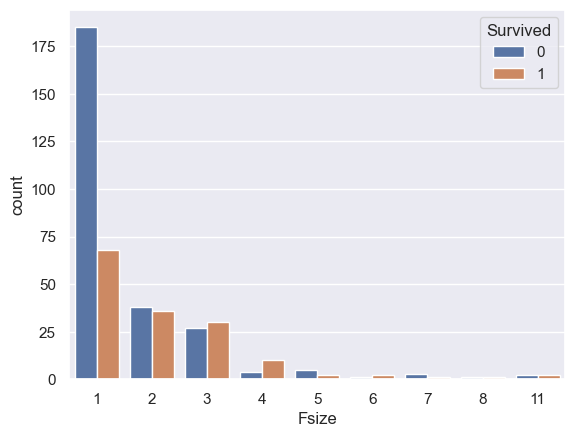

In [198]:
sns.countplot(x='Fsize', hue='Survived', data=titanic);

#### c. Group Size

In [199]:
titanic['Ticket'].value_counts()

PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64

In [200]:
new = titanic['Ticket'].value_counts().reset_index(name='Tsize')
new

index  Tsize
0    PC 17608      5
1    CA. 2343      4
2      113503      4
3    PC 17483      3
4      220845      3
..        ...    ...
358    349226      1
359      2621      1
360      4133      1
361    113780      1
362      2668      1

[363 rows x 2 columns]

In [201]:
titanic = titanic.merge(new, left_on='Ticket', right_on='index',how='inner').drop('index', axis=1);
titanic.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked Title  Fsize  Tsize  
0   330911   7.8292        Q    Mr      1      1  
1   363272   7.0000        S   Mrs      2      1  
2   240276   9.6875        Q    Mr      1      1  
3   315154   8.6625        S    Mr      1      1  
4  3101298  12.2875        S   Mrs      3      1

In [202]:
titanic['Group'] = titanic[['Tsize', 'Fsize']].max(axis=1)

In [203]:
titanic['GrpSize'] = ''
titanic.loc[titanic['Group']==1, 'GrpSize'] = 'solo'
titanic.loc[titanic['Group']==2, 'GrpSize'] = 'couple'
titanic.loc[(titanic['Group']<=4) & (titanic['Group']>=3), 'GrpSize'] = 'group'
titanic.loc[titanic['Group']>4, 'GrpSize'] = 'large group'
titanic.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked Title  Fsize  Tsize  Group GrpSize  
0   330911   7.8292        Q    Mr      1      1      1    solo  
1   363272   7.0000        S   Mrs      2      1      2  couple  
2   240276   9.6875        Q    Mr      1      1      1    solo  
3   315154   8.6625        S    Mr      1      1      1    solo  
4  3101298  12.2875        S   Mrs      3      1      3   group

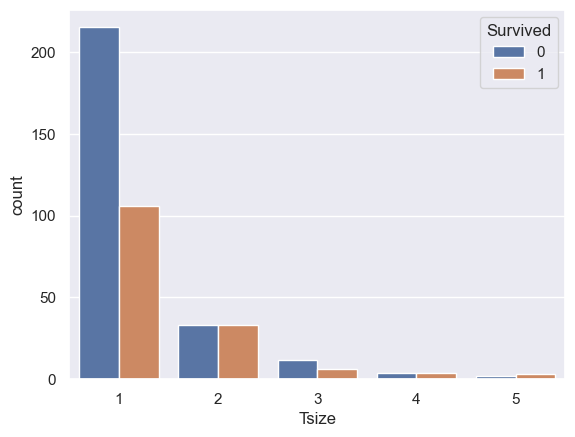

In [204]:
sns.countplot(data=titanic, x='Tsize', hue='Survived');

#### c. Fare Category

In [205]:
titanic['FareCat'] = ''
titanic.loc[titanic['Fare']<=10, 'FareCat'] = '0-10'
titanic.loc[(titanic['Fare']>10) & (titanic['Fare']<=25), 'FareCat'] = '10-25'
titanic.loc[(titanic['Fare']>25) & (titanic['Fare']<=40), 'FareCat'] = '25-40'
titanic.loc[(titanic['Fare']>40) & (titanic['Fare']<=70), 'FareCat'] = '40-70'
titanic.loc[(titanic['Fare']>70) & (titanic['Fare']<=100), 'FareCat'] = '70-100'
titanic.loc[titanic['Fare']>100, 'FareCat'] = '100+'
titanic.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked Title  Fsize  Tsize  Group GrpSize FareCat  
0   330911   7.8292        Q    Mr      1      1      1    solo    0-10  
1   363272   7.0000        S   Mrs      2      1      2  couple    0-10  
2   240276   9.6875        Q    Mr      1      1      1    solo    0-10  
3   315154   8.6625        S    Mr      1      1      1    solo    0-10  
4  3101298  12.2875        S   Mrs      3      1      3   group   10-25

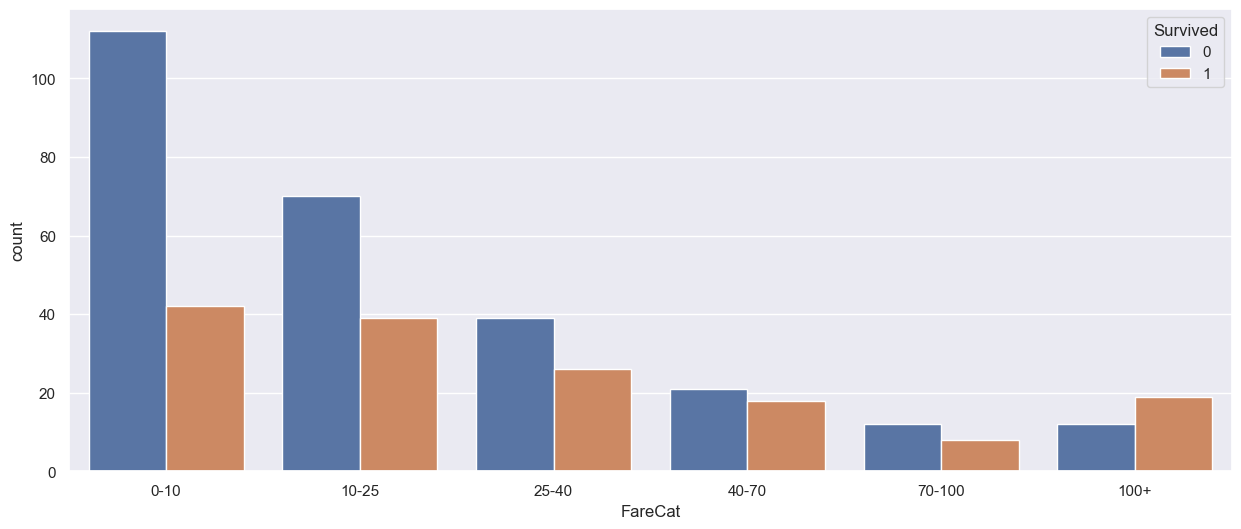

In [206]:
plt.subplots(figsize=(15,6))
sns.countplot(x='FareCat', order=['0-10', '10-25', '25-40', '40-70', '70-100', '100+'], hue='Survived', data=titanic);

#### d. Age category

In [207]:
titanic['AgeCat']=''
titanic.loc[ titanic['Age'] <= 16, 'AgeCat'] = '0-16'
titanic.loc[(titanic['Age'] > 16) & (titanic['Age'] <= 32), 'AgeCat'] = '16-32'
titanic.loc[(titanic['Age'] > 32) & (titanic['Age'] <= 48), 'AgeCat'] = '32-48'
titanic.loc[(titanic['Age'] > 48) & (titanic['Age'] <= 64), 'AgeCat'] = '48-64'
titanic.loc[ titanic['Age'] > 64, 'AgeCat']= '64+'

titanic

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male  25.0      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male  25.0      0      0   
417                      Peter, Master. Michael J    male   7.0      1      1   

                 Ticket      Fare Embarked       Title  Fsize  Tsize  Group  \
0                330911    7.8292        Q          Mr      1      1      1   
1                363272    7.0000        S         Mrs      2      1      2   
2                240276    9.6875        Q          Mr      1      1      1   
3                315154    8.6625        S          Mr      1      1      1   
4               3101298   12.2875        S         Mrs      3      1      3   
..                  ...       ...      ...         ...    ...    ...    ...   
413           A.5. 3236    8.0500        S          Mr      1      1      1   
414            PC 17758  108.9000        C  Rare Title      1      1      1   
415  SOTON/O.Q. 3101262    7.2500        S          Mr      1      1      1   
416              359309    8.0500        S          Mr      1      1      1   
417                2668   22.3583        C      Master      3      1      3   

    GrpSize FareCat AgeCat  
0      solo    0-10  32-48  
1    couple    0-10  32-48  
2      solo    0-10  48-64  
3      solo    0-10  16-32  
4     group   10-25  16-32  
..      ...     ...    ...  
413    solo    0-10  16-32  
414    solo    100+  32-48  
415    solo    0-10  32-48  
416    solo    0-10  16-32  
417   group   10-25   0-16  

[418 rows x 18 columns]

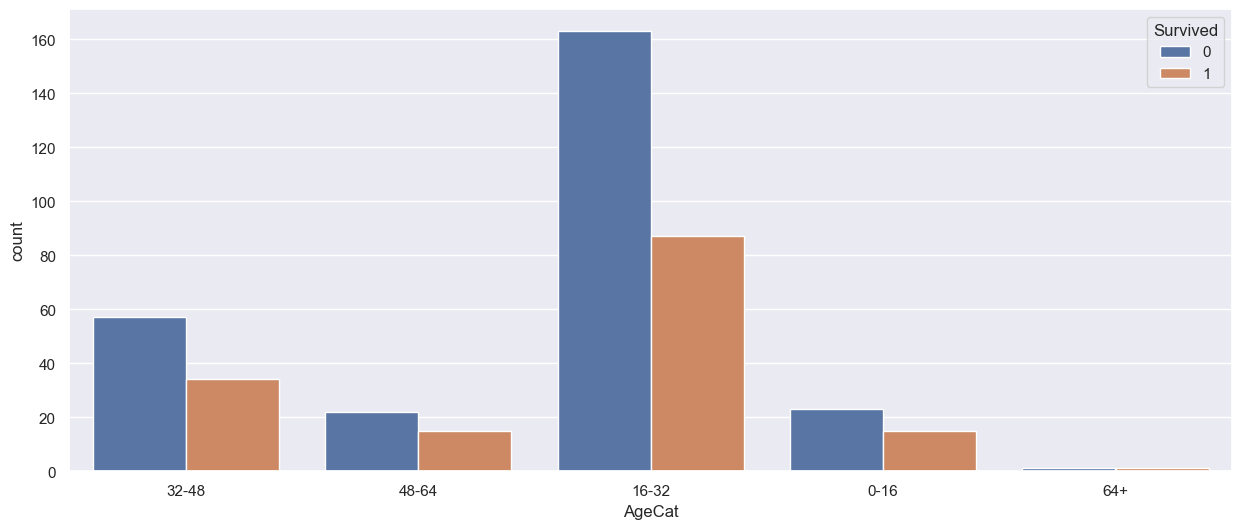

In [208]:
plt.subplots(figsize=(15,6))
sns.countplot(x='AgeCat', hue='Survived', data=titanic);

### 5. Feature Selection

Using heatmap to check out the correlation between explanatory and response variables.

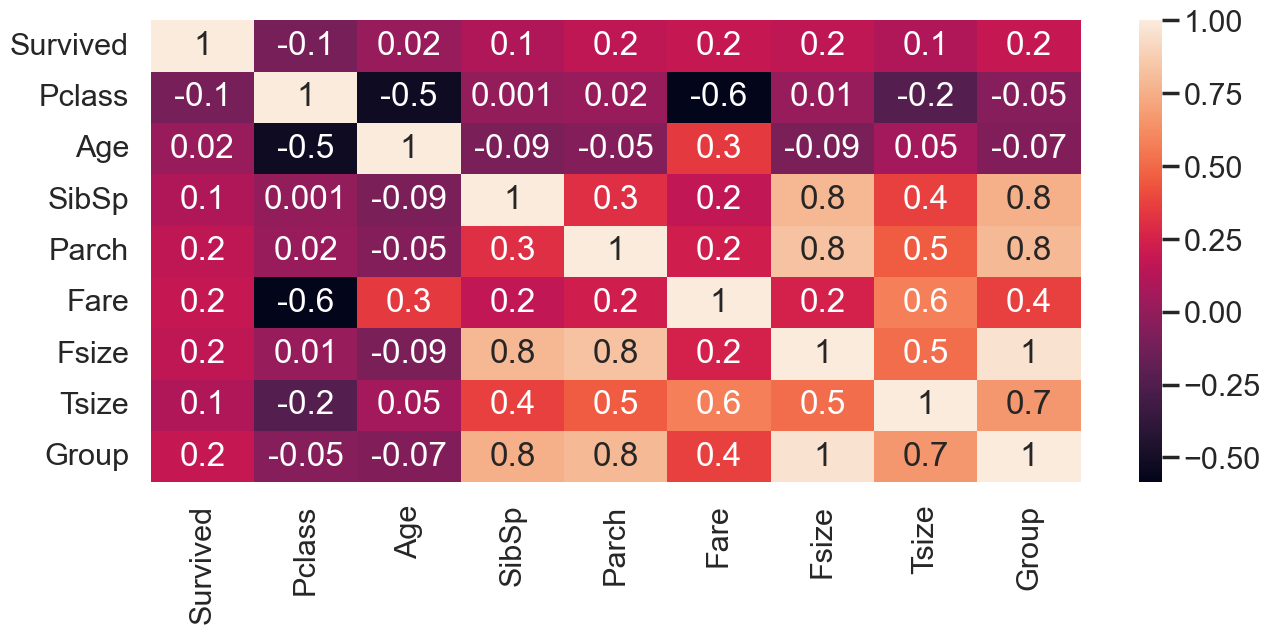

In [209]:
sns.set_context('poster')
plt.figure(figsize=(15,6))
cor = titanic.drop('PassengerId',axis=1).corr() #inplace is by default false so passenger id is temperarily removed
sns.heatmap(cor, annot=True, fmt='.1g');

_In order to avoid overfitting of the model, we will remove the unimportant features. And we see that those explanatory features which were converted into categories have higher correlation with their parent features. In simple words, the parents columns should be dropped to remove redundancy because the new columns have been derived out of them and they have their attributes stored in them._

In [210]:
drop_features = ['Name','Age','Fare','Ticket','Fsize','Tsize','Group','SibSp','Parch']

In [211]:
# drop_features = ['Name','Ticket','SibSp','Parch']

In [212]:
titanic.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked Title  Fsize  Tsize  Group GrpSize FareCat AgeCat  
0   330911   7.8292        Q    Mr      1      1      1    solo    0-10  32-48  
1   363272   7.0000        S   Mrs      2      1      2  couple    0-10  32-48  
2   240276   9.6875        Q    Mr      1      1      1    solo    0-10  48-64  
3   315154   8.6625        S    Mr      1      1      1    solo    0-10  16-32  
4  3101298  12.2875        S   Mrs      3      1      3   group   10-25  16-32

In [213]:
titanic.drop(drop_features,axis=1,inplace=True)
titanic

PassengerId  Survived  Pclass     Sex Embarked       Title GrpSize  \
0            892         0       3    male        Q          Mr    solo   
1            893         1       3  female        S         Mrs  couple   
2            894         0       2    male        Q          Mr    solo   
3            895         0       3    male        S          Mr    solo   
4            896         1       3  female        S         Mrs   group   
..           ...       ...     ...     ...      ...         ...     ...   
413         1305         0       3    male        S          Mr    solo   
414         1306         1       1  female        C  Rare Title    solo   
415         1307         0       3    male        S          Mr    solo   
416         1308         0       3    male        S          Mr    solo   
417         1309         0       3    male        C      Master   group   

    FareCat AgeCat  
0      0-10  32-48  
1      0-10  32-48  
2      0-10  48-64  
3      0-10  16-32  
4     10-25  16-32  
..      ...    ...  
413    0-10  16-32  
414    100+  32-48  
415    0-10  32-48  
416    0-10  16-32  
417   10-25   0-16  

[418 rows x 9 columns]

### 6. Applying machine learning model

#### Importing important libraries

In [214]:
import sklearn.preprocessing

#### Label encoding 

In [215]:
from sklearn.preprocessing import LabelEncoder
lab_en = LabelEncoder()
titanic.loc[:,'FareCat'] = lab_en.fit_transform(titanic.loc[:,'FareCat'])
titanic.loc[:,'AgeCat'] = lab_en.fit_transform(titanic.loc[:,'AgeCat'])

In [216]:
titanic

PassengerId  Survived  Pclass     Sex Embarked       Title GrpSize  \
0            892         0       3    male        Q          Mr    solo   
1            893         1       3  female        S         Mrs  couple   
2            894         0       2    male        Q          Mr    solo   
3            895         0       3    male        S          Mr    solo   
4            896         1       3  female        S         Mrs   group   
..           ...       ...     ...     ...      ...         ...     ...   
413         1305         0       3    male        S          Mr    solo   
414         1306         1       1  female        C  Rare Title    solo   
415         1307         0       3    male        S          Mr    solo   
416         1308         0       3    male        S          Mr    solo   
417         1309         0       3    male        C      Master   group   

     FareCat  AgeCat  
0          0       2  
1          0       2  
2          0       3  
3          0       1  
4          1       1  
..       ...     ...  
413        0       1  
414        2       2  
415        0       2  
416        0       1  
417        1       0  

[418 rows x 9 columns]

#### One hot encoding 

In [217]:
titanic = pd.get_dummies(titanic, columns=['Sex','Embarked','Title','GrpSize'])

In [218]:
titanic

PassengerId  Survived  Pclass  FareCat  AgeCat  Sex_female  Sex_male  \
0            892         0       3        0       2           0         1   
1            893         1       3        0       2           1         0   
2            894         0       2        0       3           0         1   
3            895         0       3        0       1           0         1   
4            896         1       3        1       1           1         0   
..           ...       ...     ...      ...     ...         ...       ...   
413         1305         0       3        0       1           0         1   
414         1306         1       1        2       2           1         0   
415         1307         0       3        0       2           0         1   
416         1308         0       3        0       1           0         1   
417         1309         0       3        1       0           0         1   

     Embarked_C  Embarked_Q  Embarked_S  Title_Master  Title_Miss  Title_Mr  \
0             0           1           0             0           0         1   
1             0           0           1             0           0         0   
2             0           1           0             0           0         1   
3             0           0           1             0           0         1   
4             0           0           1             0           0         0   
..          ...         ...         ...           ...         ...       ...   
413           0           0           1             0           0         1   
414           1           0           0             0           0         0   
415           0           0           1             0           0         1   
416           0           0           1             0           0         1   
417           1           0           0             1           0         0   

     Title_Mrs  Title_Rare Title  GrpSize_couple  GrpSize_group  \
0            0                 0               0              0   
1            1                 0               1              0   
2            0                 0               0              0   
3            0                 0               0              0   
4            1                 0               0              1   
..         ...               ...             ...            ...   
413          0                 0               0              0   
414          0                 1               0              0   
415          0                 0               0              0   
416          0                 0               0              0   
417          0                 0               0              1   

     GrpSize_large group  GrpSize_solo  
0                      0             1  
1                      0             0  
2                      0             1  
3                      0             1  
4                      0             0  
..                   ...           ...  
413                    0             1  
414                    0             1  
415                    0             1  
416                    0             1  
417                    0             0  

[418 rows x 19 columns]

#### Creating Independent and Dependent Variables

In [219]:
X =titanic.drop(['Survived'], axis=1)
Y = titanic[['Survived']]
print(X.shape)
print(Y.shape)

(418, 18)
(418, 1)


In [220]:
X

PassengerId  Pclass  FareCat  AgeCat  Sex_female  Sex_male  Embarked_C  \
0            892       3        0       2           0         1           0   
1            893       3        0       2           1         0           0   
2            894       2        0       3           0         1           0   
3            895       3        0       1           0         1           0   
4            896       3        1       1           1         0           0   
..           ...     ...      ...     ...         ...       ...         ...   
413         1305       3        0       1           0         1           0   
414         1306       1        2       2           1         0           1   
415         1307       3        0       2           0         1           0   
416         1308       3        0       1           0         1           0   
417         1309       3        1       0           0         1           1   

     Embarked_Q  Embarked_S  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
0             1           0             0           0         1          0   
1             0           1             0           0         0          1   
2             1           0             0           0         1          0   
3             0           1             0           0         1          0   
4             0           1             0           0         0          1   
..          ...         ...           ...         ...       ...        ...   
413           0           1             0           0         1          0   
414           0           0             0           0         0          0   
415           0           1             0           0         1          0   
416           0           1             0           0         1          0   
417           0           0             1           0         0          0   

     Title_Rare Title  GrpSize_couple  GrpSize_group  GrpSize_large group  \
0                   0               0              0                    0   
1                   0               1              0                    0   
2                   0               0              0                    0   
3                   0               0              0                    0   
4                   0               0              1                    0   
..                ...             ...            ...                  ...   
413                 0               0              0                    0   
414                 1               0              0                    0   
415                 0               0              0                    0   
416                 0               0              0                    0   
417                 0               0              1                    0   

     GrpSize_solo  
0               1  
1               0  
2               1  
3               1  
4               0  
..            ...  
413             1  
414             1  
415             1  
416             1  
417             0  

[418 rows x 18 columns]

In [221]:
Y

Survived
0           0
1           1
2           0
3           0
4           1
..        ...
413         0
414         1
415         0
416         0
417         0

[418 rows x 1 columns]

#### Train Test Splitting

In [222]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.30, random_state=5,shuffle=True)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(292, 18) (292, 1)
(126, 18) (126, 1)


In [223]:
X_train.head(2)

PassengerId  Pclass  FareCat  AgeCat  Sex_female  Sex_male  Embarked_C  \
129         1000       3        0       1           0         1           0   
6            898       3        0       1           1         0           0   

     Embarked_Q  Embarked_S  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
129           0           1             0           0         1          0   
6             1           0             0           1         0          0   

     Title_Rare Title  GrpSize_couple  GrpSize_group  GrpSize_large group  \
129                 0               0              0                    0   
6                   0               0              0                    0   

     GrpSize_solo  
129             1  
6               1

In [224]:
Y_train.head(2)

Survived
129         0
6           1

In [225]:
X_test.head(2)

PassengerId  Pclass  FareCat  AgeCat  Sex_female  Sex_male  Embarked_C  \
161         1033       1        2       2           1         0           0   
391         1275       3        1       1           1         0           0   

     Embarked_Q  Embarked_S  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
161           0           1             0           1         0          0   
391           0           1             0           0         0          1   

     Title_Rare Title  GrpSize_couple  GrpSize_group  GrpSize_large group  \
161                 0               1              0                    0   
391                 0               1              0                    0   

     GrpSize_solo  
161             0  
391             0

In [226]:
Y_test.head(2)

Survived
161         1
391         1

### Logistic Regression

Treating the response variable as categorical data and applying the logisitic regression to predict the survival class.

#### Model Training

In [227]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=100)
model.fit(X_train, Y_train)

D:\Others\Anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Others\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=100)

#### Making Prediction

In [228]:
pred=model.predict(X_test)

In [229]:
pred_prb = model.predict_proba(X_test)[:, 1]

In [230]:
pred[0:9]

array([1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [231]:
pd.DataFrame(pred).head()

0
0  1
1  1
2  0
3  0
4  0

In [232]:
pd.DataFrame(pred_prb).head()

0
0  0.982603
1  0.974579
2  0.013464
3  0.008427
4  0.040449

In [233]:
Y_test[0:9]

Survived
161         1
391         1
52          0
75          0
221         0
281         0
237         0
368         0
71          0

In [234]:
X = X_test.copy()
X['pred_probability_Survived'] = pred_prb
X['pred'] = pred
X['actual'] = Y_test

In [235]:
X.head()

PassengerId  Pclass  FareCat  AgeCat  Sex_female  Sex_male  Embarked_C  \
161         1033       1        2       2           1         0           0   
391         1275       3        1       1           1         0           0   
52           932       3        1       2           0         1           1   
75           954       3        0       1           0         1           0   
221         1084       3        1       0           0         1           0   

     Embarked_Q  Embarked_S  Title_Master  ...  Title_Mr  Title_Mrs  \
161           0           1             0  ...         0          0   
391           0           1             0  ...         0          1   
52            0           0             0  ...         1          0   
75            0           1             0  ...         1          0   
221           0           1             1  ...         0          0   

     Title_Rare Title  GrpSize_couple  GrpSize_group  GrpSize_large group  \
161                 0               1              0                    0   
391                 0               1              0                    0   
52                  0               1              0                    0   
75                  0               0              0                    0   
221                 0               0              1                    0   

     GrpSize_solo  pred_probability_Survived  pred  actual  
161             0                   0.982603     1       1  
391             0                   0.974579     1       1  
52              0                   0.013464     0       0  
75              1                   0.008427     0       0  
221             0                   0.040449     0       0  

[5 rows x 21 columns]

### 7. Model Evaluation

Applying multiple model evaluation criterias to test the prediction.

**Confusion Matrix Play ground**

In [236]:
from sklearn.metrics import confusion_matrix

In [237]:
confusion_matrix(Y_test, pred)

array([[76,  0],
       [ 0, 50]], dtype=int64)

In [238]:
confusion_matrix(Y_test, pred).ravel()

array([76,  0,  0, 50], dtype=int64)

In [239]:
tn, fp, fn, tp = confusion_matrix(Y_test, pred).ravel()
conf_matrix = pd.DataFrame({"pred_Survived": [tp, fp], "pred_Not Survived": [
                           fn, tn]}, index=["Survived", "Not Survived"])
conf_matrix

pred_Survived  pred_Not Survived
Survived                 50                  0
Not Survived              0                 76

**Accuracy**

In [240]:
from sklearn.metrics import accuracy_score

In [241]:
#Write the code here
accuracy=accuracy_score(Y_test, pred)
print("Accuracy: {}".format(accuracy))

Accuracy: 1.0


**Precision**

In [242]:
from sklearn.metrics import precision_score

In [243]:
#Write the code here
precision = precision_score(Y_test, pred)
print("Precision: {}".format(precision))

Precision: 1.0


**Recall**

In [244]:
from sklearn.metrics import recall_score

In [245]:
#Write the code here
recall= recall_score(Y_test, pred)
print("Recall: {}".format(recall))

Recall: 1.0


**F1 Score**

In [246]:
from sklearn.metrics import f1_score

In [247]:
#Write the code here
f1_score= f1_score(Y_test, pred)
print("F1 score: {}".format(f1_score))

F1 score: 1.0


**Classification Report**

In [248]:
from sklearn.metrics import classification_report

In [249]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        50

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



**ROC Curve**

In [250]:
tpr = recall
fpr = fp / (fp + tn)

In [251]:
tpr, fpr

(1.0, 0.0)

In [252]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [253]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [254]:
fpr, tpr, threshold = roc_curve(Y_test, pred_prb)

In [255]:
auc = roc_auc_score(Y_test, pred_prb)

In [256]:
auc

1.0

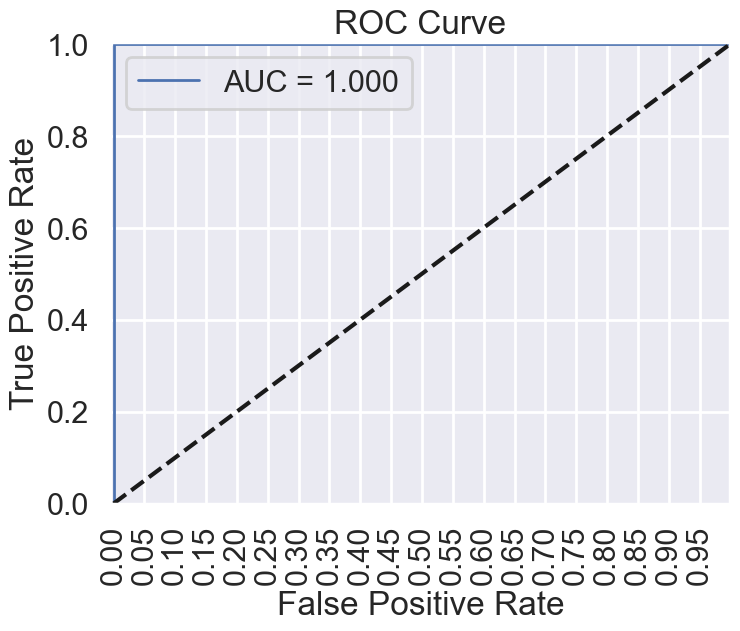

In [257]:
sns.set_context('poster')
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc)